In [13]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
img = cv2.imread("./256px-Thor_God_of_Thunder.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

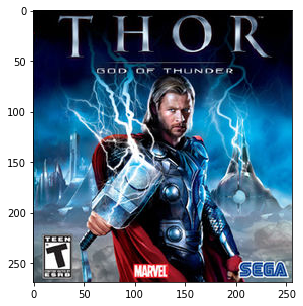

(269, 256, 3)


In [15]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()
print (img.shape)

In [33]:
c_img = img.copy()
c_img3 = img.copy()
c_img5 = img.copy()

c_img = np.reshape(c_img, (-1,3))
c_img3 = np.reshape(c_img3, (-1,3))
c_img5 = np.reshape(c_img5, (-1,3))

print (c_img.shape)
print (c_img3.shape)
print (c_img5.shape)

(68864, 3)
(68864, 3)
(68864, 3)


In [35]:
kmeans = KMeans(n_clusters=7,random_state=2)
kmeans3 = KMeans(n_clusters=3,random_state=2)
kmeans5 = KMeans(n_clusters=5,random_state=2)

In [36]:
kmeans.fit_predict(c_img)
kmeans3.fit_predict(c_img3)
kmeans5.fit_predict(c_img5)

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [37]:
centers = kmeans.cluster_centers_.astype(int)
centers3 = kmeans3.cluster_centers_.astype(int)
centers5 = kmeans5.cluster_centers_.astype(int)

print (centers)
print (centers3)
print (centers5)


[[ 22  66 102]
 [135 168 191]
 [100 119 138]
 [ 14 132 186]
 [124  25  33]
 [214 226 235]
 [  7   6  22]]
[[ 18  14  31]
 [157 178 195]
 [ 40 111 151]]
[[ 18 134 188]
 [ 16   8  23]
 [187 210 225]
 [119 133 152]
 [ 30  71 106]]


In [38]:
per = np.array(np.unique(kmeans.labels_, return_counts=True)[1], dtype=np.float32)
per = per/c_img.shape[0]

per3 = np.array(np.unique(kmeans3.labels_, return_counts=True)[1], dtype=np.float32)
per3 = per3/c_img3.shape[0]

per5 = np.array(np.unique(kmeans5.labels_, return_counts=True)[1], dtype=np.float32)
per5 = per5/c_img5.shape[0]

print(per)
print(per3)
print(per5)

[0.16420771 0.11901719 0.14209166 0.14556227 0.03955623 0.05905843
 0.33050651]
[0.42971654 0.21218634 0.35809712]
[0.15147247 0.36837825 0.10124303 0.19079635 0.1881099 ]


In [39]:
dom = [ [per[ix], centers[ix]] for ix in range(kmeans.n_clusters) ]
#print (dom)
DOM = sorted(dom, reverse=True)

dom3 = [ [per3[ix], centers3[ix]] for ix in range(kmeans3.n_clusters) ]
#print (dom)
DOM3 = sorted(dom3, reverse=True)

dom5 = [ [per5[ix], centers5[ix]] for ix in range(kmeans5.n_clusters) ]
#print (dom)
DOM5 = sorted(dom5, reverse=True)

print (DOM)
print (DOM3)
print (DOM5)

[[0.3305065055762082, array([ 7,  6, 22])], [0.16420771375464685, array([ 22,  66, 102])], [0.14556226765799257, array([ 14, 132, 186])], [0.1420916589219331, array([100, 119, 138])], [0.11901719330855019, array([135, 168, 191])], [0.05905843401486989, array([214, 226, 235])], [0.03955622676579926, array([124,  25,  33])]]
[[0.42971654275092935, array([18, 14, 31])], [0.3580971189591078, array([ 40, 111, 151])], [0.21218633828996283, array([157, 178, 195])]]
[[0.3683782527881041, array([16,  8, 23])], [0.19079635223048327, array([119, 133, 152])], [0.18810989776951673, array([ 30,  71, 106])], [0.15147246747211895, array([ 18, 134, 188])], [0.10124302973977695, array([187, 210, 225])]]


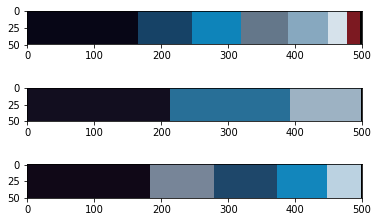

In [48]:
color_p = np.zeros((50,500,3)).astype(int)
color_p3 = np.zeros((50,500,3)).astype(int)
color_p5 = np.zeros((50,500,3)).astype(int)

start = 0
for ix in range(kmeans.n_clusters):
    width = int( (DOM[ix][0])*color_p.shape[1] )
    
    end = start+width
    color_p[:,start:end, :] = DOM[ix][1]
    
    start = end
    
start = 0
for ix in range(kmeans3.n_clusters):
    width = int( (DOM3[ix][0])*color_p3.shape[1] )
    
    end = start+width
    color_p3[:,start:end, :] = DOM3[ix][1]
    
    start = end
    
start = 0
for ix in range(kmeans5.n_clusters):
    width = int( (DOM5[ix][0])*color_p5.shape[1] )
    
    end = start+width
    color_p5[:,start:end, :] = DOM5[ix][1]
    
    start = end

f1=plt.figure(0)  
plt.subplot(3,1,1)
plt.imshow(color_p)
plt.subplot(3,1,2)
plt.imshow(color_p3)
plt.subplot(3,1,3)
plt.imshow(color_p5)
plt.show()

f1.savefig('palette.png')

In [49]:
for ix in range(c_img.shape[0]):
    c_img[ix] = centers[kmeans.labels_[ix]]
    
for ix in range(c_img3.shape[0]):
    c_img3[ix] = centers3[kmeans3.labels_[ix]]

for ix in range(c_img5.shape[0]):
    c_img5[ix] = centers5[kmeans5.labels_[ix]]    
    
c_img = np.reshape(c_img, (img.shape[0], img.shape[1], 3))
c_img3 = np.reshape(c_img3, (img.shape[0], img.shape[1], 3))
c_img5 = np.reshape(c_img5, (img.shape[0], img.shape[1], 3))

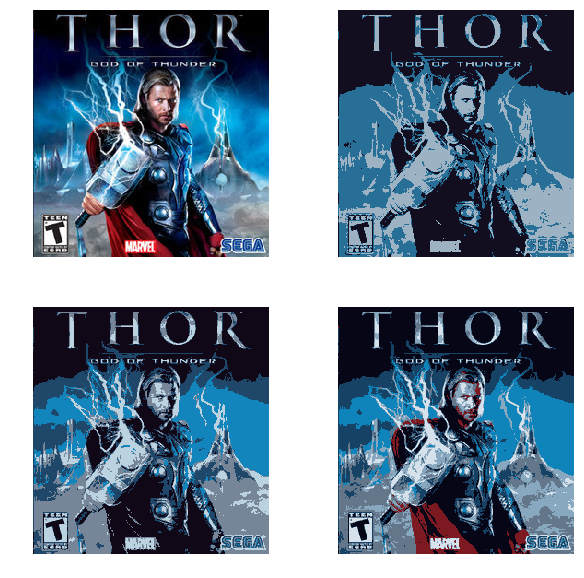

In [52]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.axis("off")
plt.imshow(img)

plt.subplot(2,2,2)
plt.axis("off")
plt.imshow(c_img3)

plt.subplot(2,2,3)
plt.axis("off")
plt.imshow(c_img5)

plt.subplot(2,2,4)
plt.axis("off")
plt.imshow(c_img)


plt.show()

fig.savefig('my_figure.png')